# Part I: Research Question
## A.  Describe the purpose of this data mining report by doing the following:
### 1.  Propose one question relevant to a real-world organizational situation that you will answer using market basket analysis.

A strategy set forth by the executive team for this telecommunication company is to increase customer retention by offering discounts on items available for purchase. By bundling items typically bought together, the company can reduce the number of items it needs to discount to a select few while still giving the most significant incentive to its customers.

This market basket analysis will answer this strategy's key question: What items are bought together most frequently and ideal for bundling together for discounts?

### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scenario's scope and represented in the available data.

This analysis aims to develop a series of rules for the items most frequently bought together and understand how they compare to other transactions in the dataset by calculating their confidence, lift, and individual support for the items.

# Part II: Market Basket Justification
## B.  Explain the reasons for using market basket analysis by doing the following:
### 1.  Explain how market basket analyzes the selected dataset. Include expected outcomes.

A market basket analysis studies transactions in a data set of purchases and finds patterns of items frequently bought together. In this dataset, there are 7,501 customer purchases of 119 different items. 

With so many transactions of so many items, it can be difficult to discern which items are most frequently bought together if studying the frequency of every possible permutation of items included.
For example, looking at all possible permutations of 2 items bought together results in 14,042 possibilities, while examining possibilities of 3 items purchased together increases that to 1,642,914 permutations.

A set of rules for purchases that large would be too cumbersome to analyze properly. However, by examing the transactions in this dataset, eliminating unnecessary rules is easier by calculating the support, lift, and confidence of items bought in the transaction data using an Apriori algorithm.
Once completed, a market basket analysis will have narrowed down sets of items purchased together and created a list of rules for those sets. Filtering those sets of items further will allow decision-makers to craft a strategy around items in these sets of rules to accomplish stated goals.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [66]:
df = pd.read_csv('teleco_market_basket.csv')

In [67]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [69]:
df.iloc[57].dropna()

Item01    Dust-Off Compressed Gas 2 pack
Item02                      Apple Pencil
Item03    Falcon Dust Off Compressed Gas
Item04                         HP 61 ink
Item05             USB 2.0 Printer cable
Name: 57, dtype: object

### 2.  Provide one example of transactions in the dataset.
One transaction in the dataset is that of a customer who purchased the following items in order:

1. Dust-Off Compressed Gas 2 pack
2. Apple Pencil
3. Falcon Dust Off Compressed Gas
4. HP 61 ink
5. USB 2.0 Printer cable

### 3.  Summarize one assumption of market basket analysis.

A critical tool in the market basket analysis is the Apriori algorithm. It is a powerful tool for narrowing down possible sets of items. One central assumption it relies on is that subsets of frequent sets must also be frequent. Suppose an item in a set is infrequent and it falls below a minimum support threshold. In that case, sets containing that item will be infrequent, and can be eliminated for consideration in the analysis

# Part III: Data Preparation and Analysis
## C.  Prepare and perform market basket analysis by doing the following:
### 1.  Transform the dataset to make it suitable for market basket analysis. Include a copy of the cleaned dataset.

The first step to preparing the data is to drop all transactions with no purchases.

In [70]:
df.dropna(how='all', inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.2+ MB


This reduces the data set from 15,002 observations to 7,501

In [72]:
df[df.isnull().sum(axis=1) == 20].shape

(0, 20)

The next step is to reshape the data into a list of lists of the transactions and drop the null, or empty, items in each transaction.

In [73]:
df.fillna('nothing', inplace=True)

In [74]:
transactions = df.values.tolist()

In [75]:
transactions = [[sale for sale in sales if 'nothing'not in sale]for sales in transactions]

Next is the creation of a list of all item purchases and a list of unique items purchased.

In [76]:
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

Finally, a pandas dataframe is created from the transactions list of lists with columns for each unique item and a row for each transaction, with “True” values for each item purchased by that customer and “False” for all other items.

The result is a pandas dataframe of 7,501 rows for customer purchases and 119 columns for each item, and boolean values indicating each purchase.

In [77]:
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head(10)

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, 10ft iPHone Charger Cable to seenda Wireless mouse
dtypes: bool(119)
memory usage: 871.8 KB


In [79]:
onehot.to_csv("D212_Task3_transformed_data.csv")

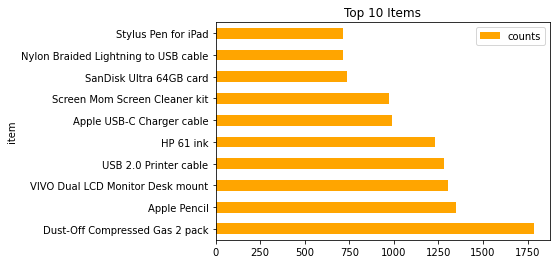

In [80]:
top10 = onehot.sum().sort_values(ascending=False).head(10).to_frame(name='counts')
top10.reset_index(inplace=True)
top10.rename(columns={"index": "item"}, inplace=True)


top10.plot.barh(x = 'item', y = 'counts', color='orange')
plt.title('Top 10 Items')
plt.show;

In [81]:
support = onehot.mean().sort_values(ascending=False)
support.head(20)

Dust-Off Compressed Gas 2 pack           0.238368
Apple Pencil                             0.179709
VIVO Dual LCD Monitor Desk mount         0.174110
USB 2.0 Printer cable                    0.170911
HP 61 ink                                0.163845
Apple USB-C Charger cable                0.132116
Screen Mom Screen Cleaner kit            0.129583
SanDisk Ultra 64GB card                  0.098254
Nylon Braided Lightning to USB cable     0.095321
Stylus Pen for iPad                      0.095054
Apple Lightning to Digital AV Adapter    0.087188
Syntech USB C to USB Adapter             0.081056
USB Type C to USB-A Charger cable        0.080389
HP 63XL Ink                              0.079323
TopMate C5 Laptop Cooler pad             0.076523
Logitech M510 Wireless mouse             0.071457
Anker USB C to HDMI Adapter              0.068391
FEIYOLD Blue light Blocking Glasses      0.065858
SanDisk Ultra 128GB card                 0.063325
Cat8 Ethernet Cable                      0.062525


In [82]:
transactions.count(['Dust-Off Compressed Gas 2 pack', 'Apple Pencil'])

11

In [83]:
rules = list(permutations(items, 2))
len(rules)

14042

In [84]:
rules = list(permutations(items, 3))
len(rules)

1642914

### 2.  Execute the code used to generate association rules with the Apriori algorithm. Provide screenshots that demonstrate the error-free functionality of the code.

In [85]:
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)
frequent_itemsets.head()

,support,itemsets
0,0.009065,(10ft iPHone Charger Cable)
1,0.050527,(10ft iPHone Charger Cable 2 Pack)
2,0.005199,(3 pack Nylon Braided Lightning Cable)
3,0.042528,(3A USB Type C Cable 3 pack 6FT)
4,0.019064,(5pack Nylon Braided USB C cables)


In [86]:
len(frequent_itemsets)

6778

In [87]:
frequent_itemsets.mean()

support    0.003136
dtype: float64

### 3.  Provide values for the support, lift, and confidence of the association rules table.

In [88]:
rules = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.003136)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable),0.238368,0.009065,0.003200,0.013423,1.480655,0.001039,1.004417
1,(10ft iPHone Charger Cable),(Dust-Off Compressed Gas 2 pack),0.009065,0.238368,0.003200,0.352941,1.480655,0.001039,1.177067
2,(10ft iPHone Charger Cable 2 Pack),(3A USB Type C Cable 3 pack 6FT),0.050527,0.042528,0.003200,0.063325,1.489020,0.001051,1.022203
3,(3A USB Type C Cable 3 pack 6FT),(10ft iPHone Charger Cable 2 Pack),0.042528,0.050527,0.003200,0.075235,1.489020,0.001051,1.026719
4,(10ft iPHone Charger Cable 2 Pack),(Anker USB C to HDMI Adapter),0.050527,0.068391,0.006932,0.137203,2.006162,0.003477,1.079755


In [89]:
rules.mean()

antecedent support    0.081399
consequent support    0.081399
support               0.005980
confidence            0.142954
lift                  1.875117
leverage              0.002219
conviction            1.088430
dtype: float64

In [90]:
filtered_rules = rules[(rules['antecedent support'] > 0.081399) & 
                                (rules['support'] > 0.005980) & 
                                (rules['confidence'] > 0.142954) & 
                                (rules['lift'] > 1.875117)]
len(filtered_rules)

9

### 4.  Identify the top three rules generated by the Apriori algorithm. Include a screenshot of the top rules along with their summaries.
The top 3 rules resulting from the Apriori Algorithm are:
1. [‘ VIVO Dual LCD Monitor Desk mount’, ‘SanDisk Ultra 64GB card’]	
2. [‘SanDisk Ultra 64GB card’, ’VIVO Dual LCD Monitor Desk mount’]	
3. [‘Screen Mom Screen Cleaner kit’, ‘Nylon Braided Lightning to USB cable]

In [91]:
filtered_rules.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1384,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
1385,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
1202,(Screen Mom Screen Cleaner kit),(Nylon Braided Lightning to USB cable),0.129583,0.095321,0.023597,0.182099,1.910382,0.011245,1.106099
1203,(Nylon Braided Lightning to USB cable),(Screen Mom Screen Cleaner kit),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781
3475,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902


In [92]:
filtered_rules[['antecedents','consequents','support']].sort_values(by='support', ascending=False).head()

,antecedents,consequents,support
1384,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.039195
1385,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.039195
1202,(Screen Mom Screen Cleaner kit),(Nylon Braided Lightning to USB cable),0.023597
1203,(Nylon Braided Lightning to USB cable),(Screen Mom Screen Cleaner kit),0.023597
3475,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.017064


In [93]:
filtered_rules['consequents'].loc[3475]

frozenset({'Dust-Off Compressed Gas 2 pack',
           'VIVO Dual LCD Monitor Desk mount'})

Since the 1st and 2nd rules are mirrored in their antecedents and consequents, as well as the 3rd rule and the 4th rule, it would be worth considering the 5th rule generated as a third option for sets which is:

[‘SanDisk Ultra 64GB card’, {'Dust-Off Compressed Gas 2 pack', 'VIVO Dual LCD Monitor Desk mount'}]


In [94]:
antecedents = ['SanDisk Ultra 64GB card', 'Screen Mom Screen Cleaner kit',
               'Nylon Braided Lightning to USB cable', 'VIVO Dual LCD Monitor Desk mount']

In [95]:
top10[top10['item'].isin(antecedents)]

,item,counts
2,VIVO Dual LCD Monitor Desk mount,1306
6,Screen Mom Screen Cleaner kit,972
7,SanDisk Ultra 64GB card,737
8,Nylon Braided Lightning to USB cable,715


# Part IV: Data Summary and Implications
## D.  Summarize your data analysis by doing the following:
### 1.  Summarize the significance of support, lift, and confidence from the results of the analysis.

In [96]:
cols = ['antecedents', 'consequents', 'antecedent support',
        'consequent support', 'support', 'confidence', 'lift']
filtered_rules[cols].sort_values(by='support', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
1384,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162
1385,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162
1202,(Screen Mom Screen Cleaner kit),(Nylon Braided Lightning to USB cable),0.129583,0.095321,0.023597,0.182099,1.910382


The Association Rule function helps establish additional metrics for filtering data on the most frequent item sets. For the top 3 item sets, the key metrics for understanding these rules in the transaction data are:


**Support** – The frequency of an item or item set appearing in all the transactions. In this dataset, there are three support metrics. First is the support for the first item in the rule, the antecedent support. Next is the consequent support, the preceding item in the itemset. And the third metric for support is the support for all items in the set together.

Support is a simple calculation of frequency found with the following equation:

$$\displaystyle  \frac {\text{Total sum of transactions  with item or itemset}}{\text{Total sum of all transaction}} $$

In this case each rule has the following support metrics:

1. [‘ VIVO Dual LCD Monitor Desk mount’, ‘SanDisk Ultra 64GB card’]
    - antecedent support = 0.174110
    - consequent support = 0.098254
    - support = 0.039195
        
2. [‘SanDisk Ultra 64GB card’, ’VIVO Dual LCD Monitor Desk mount’]
    - antecedent support = 0. 098254
    - consequent support = 0. 174110
    - support = 0.039195
        
3. [‘Screen Mom Screen Cleaner kit’, ‘Nylon Braided Lightning to USB cable]
    - antecedent support = 0.095321	
    - consequent support = 0.129583
    - support = 0.023597
    

**Confidence** - A conditional probability that the consequent item will be purchased if the antecedent item has already been purchased. It is calculated by dividing the support of the antecedent and consequent items by the support of the antecedent item.
$$\displaystyle  \frac {\text{ antecedent support & consequent support }}{\text{ antecedent support }} $$

The confidence for the top three rules in this analysis are: 
1. [‘ VIVO Dual LCD Monitor Desk mount’, ‘SanDisk Ultra 64GB card’] = 0.225115
2. [‘SanDisk Ultra 64GB card’, ’VIVO Dual LCD Monitor Desk mount’] = 0.398915	
3. [‘Screen Mom Screen Cleaner kit’, ‘Nylon Braided Lightning to USB cable] = 0.247552


**Lift** - The likelihood that the items in the item set will be purchased together despite their independent supports. It is a valuable metric in determining the popularity of the two items as a set versus their independent popularity. To calculate for lift of an item set, the support of the item set is divided by the antecedent supported times the consequent support.

$$\displaystyle  \frac {\text{ antecedent support & consequent support }}{\text{(antecedent support) X (consequent support)}} $$

Lift is critical in that it can help determine whether frequent items in a set would have occurred together randomly or if there is an association between them. As a set, they are more popular than each item on its own.

If a set’s lift is 1, then the chances of the two items appearing in a set together are more likely due to their own frequency. However, lift values higher than 1 would indicate that these items are frequently bought together with greater association between them rather than the popularity of each item on its own. The greater the lift, the greater the association.

The lift for the top three rules in this analysis are: 
1.	[‘ VIVO Dual LCD Monitor Desk mount’, ‘SanDisk Ultra 64GB card’] = 2.291162
2.	[‘SanDisk Ultra 64GB card’, ’VIVO Dual LCD Monitor Desk mount’] = 2.291162	
3.	[‘Screen Mom Screen Cleaner kit’, ‘Nylon Braided Lightning to USB cable] = 1.910382

Each lift value for these sets greatly exceeds 1, indicating a strong association between each item within the set.


### 2.  Discuss the practical significance of the findings from the analysis.

The results of this market basket analysis have uncovered some critical metrics in determining the popularity of certain item groups in the transaction history of this dataset.

The support values for the top item sets indicate that these items are frequently bought together, more so than any other item set within the data.

Furthermore, with lift values of 1.91 and greater for each of these item sets, it is clear that they have a strong association for the items within.

### 3.  Recommend a course of action for the real-world organizational situation from part A1 based on your results from part D1.

A strategy set forth by the executive team for this telecommunication company is to increase customer retention by offering discounts on items available for purchase. By bundling items typically bought together, the company can reduce the number of items it needs to discount to a select few while still giving the most significant incentive to its customers.

This market basket analysis will answer this strategy's key question: What items are bought together most frequently and ideal for bundling together for discounts?

This market basket analysis results have indicated the most frequent item sets based on support and validated based on lift. I would recommend the executive team explore bundling the items within each of these top sets and discounting them based on the plan to reduce customer churn by offering discounts on items of interest.

These bundles would include:

1. The VIVO Dual LCD Monitor Desk mount with the SanDisk Ultra 64GB card
2. The SanDisk Ultra 64GB card with the VIVO Dual LCD Monitor Desk mount	
3. The Screen Mom Screen Cleaner kit with the Nylon Braided Lightning to USB cable

And since the first and second bundles are mirrored versions of each other, I would also recommend the executive team consider the next most frequent distinct set in the analysis:

1. The SanDisk Ultra 64GB card with the Dust-Off Compressed Gas 2 pack and VIVO Dual LCD Monitor Desk mount

This set had a support value of 0.017064, a confidence of 0.173677, and a lift value of 2.907928. Its Lift value is greater than any of the other three bundles, so while it is not bought as frequently as the top 3 sets, the items within it have a much higher association and are ideal candidates for an extra bundle at a discount.

# Part V: Attachments
## E.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

Attached as a link with submission
 
## F.  Record all web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

Removing NaN values from a lists of lists.

KusiKusi 71511 gold badge99 silver badges1919 bronze badges, tomjntomjn 4, MrGeekMrGeek 21.1k44 gold badges2828 silver badges5252 bronze badges, & Rahul SinghRahul Singh 17466 bronze badges. (1967, April 1). How to remove Nan from list of lists with string entries? Stack Overflow. Retrieved June 15, 2022, from https://stackoverflow.com/questions/57790623/how-to-remove-nan-from-list-of-lists-with-string-entries 

## G.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
“D212 – Data Mining II” Datacamp, April-Mary 2022, https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii

## H.  Demonstrate professional communication in the content and presentation of your submission.
